# HW06 – Creating a Parsimonious Model

## By Donovan Manogue

## Section 3 Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [6]:
#In this section we are importing all the libraries needed for this notebook

## Section 4 Import Data

In [8]:
df_realestate = pd.read_csv('data/Real Estate Data - Week 6.csv')
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1387 non-null   int64  
 1   Dwelling Type                  1387 non-null   object 
 2   Lot Frontage                   1387 non-null   float64
 3   Lot Area                       1387 non-null   int64  
 4   Land Contour                   1387 non-null   object 
 5   Neighborhood                   1387 non-null   object 
 6   Location Condition             1387 non-null   object 
 7   Overall Quality                1387 non-null   int64  
 8   Overall Cond                   1387 non-null   int64  
 9   Year Built                     1387 non-null   int64  
 10  Masonry/Veneer Area            1387 non-null   float64
 11  Basement Finished Area         1387 non-null   int64  
 12  Basement Unfinished Area       1387 non-null   i

In [9]:
# In section 4 we are importing our data and we are creating our dataframe

## Section 5 Create the Dataset# for Regresssion

### Section 5a Endcode Kitchen Qual

In [12]:
from sklearn.preprocessing import LabelEncoder
lc= LabelEncoder()

In [13]:
df_realestate['Kitchen Qual'].value_counts()

Kitchen Qual
Average      691
Good         575
Excellent     88
Fair          33
Name: count, dtype: int64

In [14]:
df_realestate['Kitchen Qual'] 

0          Good
1       Average
2          Good
3          Good
4          Good
         ...   
1382    Average
1383    Average
1384       Good
1385       Good
1386    Average
Name: Kitchen Qual, Length: 1387, dtype: object

In [15]:
def KitchenQualEncode(v):
    if v['Kitchen Qual'] == 'Fair':
        return 1
    elif v['Kitchen Qual'] == 'Average':
        return 2
    elif v['Kitchen Qual'] == 'Good':
        return 3
    elif v['Kitchen Qual'] == 'Excellent':
        return 4
    else:
        return 0
df_realestate['Kitchen_Qual_Value'] = df_realestate.apply(KitchenQualEncode, axis = 1)
display(df_realestate[['Kitchen Qual', 'Kitchen_Qual_Value']].head())

,Kitchen Qual,Kitchen_Qual_Value
0,Good,3
1,Average,2
2,Good,3
3,Good,3
4,Good,3


In [16]:
df_realestate['Kitchen_Qual_Value'].value_counts()

Kitchen_Qual_Value
2    691
3    575
4     88
1     33
Name: count, dtype: int64

In [17]:
# In this sectiomn I used a function to encode the qualitative values into quanitative values

### Section 5b Create X and y

In [19]:
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.0f}'.format
df_quanitative_only=df_realestate.select_dtypes(include=['int64','float64'])
df_quanitative_only.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond',
       'Year Built', 'Masonry/Veneer Area', 'Basement Finished Area',
       'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
       'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces',
       'Garage Cars', 'Sale Price', 'Porch Area', 'Full Bathrooms',
       'Half Bathrooms', 'Pool', 'Extra Kitchens', 'Baths per Bedroom',
       'dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD',
       'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES',
       'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD',
       'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked',
       'lc_Depression', 'lc_Hillside', 'nh_Bloomington Heights', 'nh_Bluestem',
       'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 'nh_College Creek',
       'nh_Crawford', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road',
       'nh_Meadow Village', 'nh_Mitchel

In [20]:
df_quanitative_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             1387 non-null   int64  
 1   Lot Frontage                   1387 non-null   float64
 2   Lot Area                       1387 non-null   int64  
 3   Overall Quality                1387 non-null   int64  
 4   Overall Cond                   1387 non-null   int64  
 5   Year Built                     1387 non-null   int64  
 6   Masonry/Veneer Area            1387 non-null   float64
 7   Basement Finished Area         1387 non-null   int64  
 8   Basement Unfinished Area       1387 non-null   int64  
 9   1st Floor Area                 1387 non-null   int64  
 10  2nd Floor Area                 1387 non-null   int64  
 11  Bedrooms Above Grade           1387 non-null   int64  
 12  Total Rooms Above Grade        1387 non-null   i

In [21]:
df_quanitative_only.head()

,Id,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen_Qual_Value
0,1,65,8450,7,5,2003,196,706,150,856,854,3,8,0,2,208500,61,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
1,2,80,9600,6,8,1976,0,978,284,1262,0,3,6,1,2,181500,298,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2
2,3,68,11250,7,5,2001,162,486,434,920,866,3,6,1,2,223500,42,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
3,4,60,9550,7,5,1915,0,216,540,961,756,3,7,1,3,140000,307,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3
4,5,84,14260,8,5,2000,350,655,490,1145,1053,4,9,1,3,250000,276,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3


In [22]:
df_quanitative_only=df_quanitative_only.drop(['Id'], axis=1)

In [23]:
X= df_quanitative_only
y= df_realestate['Sale Price']

### The dataset has no null values, and only contains integers and floats which are all quanitative values, it also contains some variables that used to be qualititave values that were converted into qualitative values in our last homeworks. Since this section is asking dor only the features that can be considered for regression, I decided to create a dataframe based on the original dataframe that only selected the quanititave values to make it easier when deciding which variables to keep, after scrolling through the columns, I decided I wanted to keep everything but 'ID' to get an idea of everything that adds value to the dataset and everything that doesn't when I run the regression model, then take it away from there.

In [25]:
# In this section I created varibales for X while keeping y as 'Sale Price' 
# I also explained why I chose the vairiables I did as well creating a new dataframe to make it easier to get rid of-
# -all the object and boolean values

## Section 6 Create an Initial Multiple Regression Model

### Section 6a Create Initial Multiple Regression Model

In [28]:
df_reg = df_quanitative_only

X= df_reg
y= df_realestate['Sale Price']

In [29]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

predictions = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.559e+30
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:03   Log-Likelihood:                 29489.
No. Observations:                1387   AIC:                        -5.883e+04
Df Residuals:                    1313   BIC:                        -5.844e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -1.98e-09   8.31e-10     -2.383      0.017   -3.61e-09    -3.5e-10
Lot Frontage                  -6.842e-13    1.3e-13     -5.243      0.000    -9.4e-13   -4.28e-13
Lot Area                       1.267e-15   4.98e-16      2.546      0.011    2.91e-16    2.24e-15
Overall Quality                7.674e-11   6.13e-12     12.515      0.000    6.47e-11    8.88e-11
Overall Cond                   9.876e-12   4.48e-12      2.203      0.028    1.08e-12    1.87e-11
Year Built                     7.871e-13   4.24e-13      1.859      0.063   -4.37e-14    1.62e-12
Masonry/Veneer Area            8.714e-14   2.83e-14      3.079      0.002    3.16e-14    1.43e-13
Basement Finished Area         1.612e-13   1.87e-14      8.627      0.000    1.25e-13    1.98e-13
Basement Unfinished Area       7.848e-14   1.71e-14      4.595      0.000     4.5e-14    1.12e-13
1st Floor Area                 1.755e-13   2.79e-14      6.282      0.000    1.21e-13     2.3e-13
2nd Floor Area                 1.202e-13   2.98e-14      4.035      0.000    6.17e-14    1.79e-13
Bedrooms Above Grade           -7.03e-12   1.02e-11     -0.691      0.489    -2.7e-11    1.29e-11
Total Rooms Above Grade       -2.832e-12   5.67e-12     -0.499      0.618    -1.4e-11    8.29e-12
Fireplaces                    -1.201e-11   7.97e-12     -1.507      0.132   -2.76e-11    3.62e-12
Garage Cars                   -1.815e-11   9.88e-12     -1.838      0.066   -3.75e-11    1.22e-12
Sale Price                        1.0000   1.86e-16   5.38e+15      0.000       1.000       1.000
Porch Area                    -3.282e-14   2.97e-14     -1.106      0.269    -9.1e-14    2.54e-14
Full Bathrooms                 1.383e-11   1.23e-11      1.127      0.260   -1.02e-11    3.79e-11
Half Bathrooms                 2.501e-12   1.02e-11      0.245      0.806   -1.75e-11    2.25e-11
Pool                          -2.308e-11   6.88e-11     -0.335      0.737   -1.58e-10    1.12e-10
Extra Kitchens                 -6.95e-12   3.42e-11     -0.203      0.839   -7.41e-11    6.02e-11
Baths per Bedroom             -1.946e-11   2.42e-11     -0.805      0.421   -6.69e-11     2.8e-11
dt_1-1/2 STORY ALL AGES        6.667e-12   2.44e-11      0.273      0.785   -4.12e-11    5.45e-11
dt_1-STORY 1945 & OLDER         2.55e-11   2.72e-11      0.937      0.349   -2.79e-11    7.89e-11
dt_1-STORY PUD                 7.778e-12   2.45e-11      0.318      0.751   -4.03e-11    5.58e-11
dt_2 FAMILY CONVERSION        -1.964e-11   3.96e-11     -0.495      0.620   -9.74e-11    5.81e-11
dt_2-1/2 STORY ALL AGES        1.752e-11    5.1e-11      0.344      0.731   -8.25e-11    1.18e-10
dt_2-STORY 1945 & OLDER       -1.141e-11   3.47e-11     -0.329      0.742   -7.94e-11    5.66e-11
dt_2-STORY 1946 & NEWER       -9.671e-12   2.

In [30]:
# In this section I created an initial multiple regression model to all the x values I had in the dataset getting a perfect 1.000
# Which definitely isn't right...

### Section 6b Analyze the initial multiple regression results

In [32]:
#Create Predictions dataframe
df_predictions = pd.DataFrame(predictions)
df_predictions=df_predictions.rename(columns = {0:'Int_Pred1'})

#Create Residuals dataframe
df_resid = pd.DataFrame(resid)
df_resid=df_resid.rename(columns = {0:'Resid1'})

In [33]:
df_reg = pd.concat([df_reg, df_predictions, df_resid], axis=1)

df_reg.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen_Qual_Value,Int_Pred1,Resid1
0,65,8450,7,5,2003,196,706,150,856,854,3,8,0,2,208500,61,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,208500,0
1,80,9600,6,8,1976,0,978,284,1262,0,3,6,1,2,181500,298,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,181500,0
2,68,11250,7,5,2001,162,486,434,920,866,3,6,1,2,223500,42,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,223500,0
3,60,9550,7,5,1915,0,216,540,961,756,3,7,1,3,140000,307,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,140000,0
4,84,14260,8,5,2000,350,655,490,1145,1053,4,9,1,3,250000,276,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,250000,0


<Figure size 2000x800 with 0 Axes>

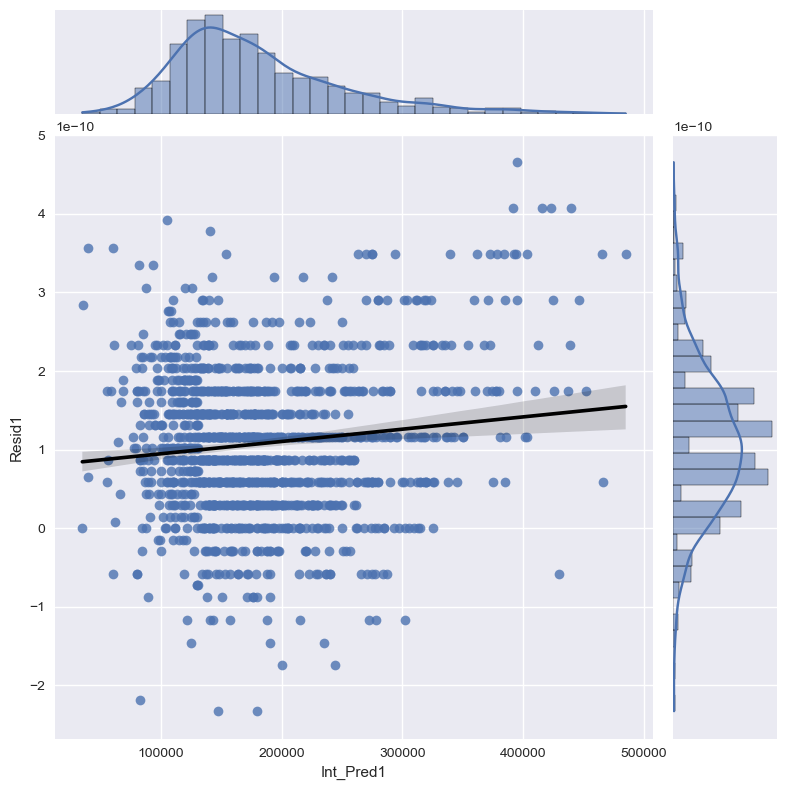

In [34]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Int_Pred1', y='Resid1', kind = "reg", data = df_reg, ratio=5, height = 8, 
              line_kws={'color': 'black'})

In [35]:
corrMatrix = df_reg.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen_Qual_Value,Int_Pred1,Resid1
Lot Frontage,1,0,0,-0,0,0,-0,0,0,0,0,0,0,0,0,0,0,-0,0,0,-0,-0,-0,-0,0,0,0,0,-0,0,-0,-0,0,-0,0,-0,-0,-0,-0,-0,0,0,0,-0,0,-0,-0,-0,0,0,-0,0,-0,0,0,-0,-0,0,-0,0,0,0,-0,-0,0,-0,-0,0,0,0,0,-0,0,0,0
Lot Area,0,1,0,0,-0,0,0,-0,0,0,0,0,0,0,0,0,0,0,0,-0,0,0,-0,-0,0,0,-0,0,-0,-0,-0,0,0,0,0,-0,-0,-0,-0,0,-0,0,-0,0,-0,-0,0,-0,0,0,0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,0,0,0,-0,-0,0,0,-0,0,0,-0,0,0,-0
Overall Quality,0,0,1,-0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,-0,0,-0,-0,0,-0,0,-0,0,0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,-0,0,0,-0,0,-0,-0,-0,-0,0,0,0,-0,-0,0,0,-0,0,0,0,-0,-0,0,-0,0,0,-0,-0,0,-0,0,0,-0,1,1,-0
Overall Cond,-0,0,-0,1,-0,-0,-0,-0,-0,0,0,-0,-0,-0,-0,0,-0,-0,0,-0,-0,0,0,-0,0,0,0,-0,-0,-0,0,0,0,-0,-0,-0,0,-0,0,0,-0,0,-0,-0,0,-0,-0,-0,-0,-0,0,0,0,-0,-0,0,-0,-0,0,0,0,0,-0,0,0,-0,-0,-0,-0,-0,-0,0,-0,-0,0
Year Built,0,-0,1,-0,1,0,0,0,0,0,-0,0,0,1,1,0,0,0,-0,-0,0,-0,-0,0,-0,-0,-0,0,0,-0,0,0,-0,-0,0,0,0,-0,-0,-0,0,-0,-0,0,-0,0,0,0,0,0,0,-0,-0,0,0,-0,0,0,0,-0,-0,-0,0,-0,0,-0,-0,0,-0,0,0,-1,1,1,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gf_Rough Finished,0,0,0,-0,0,0,0,0,0,-0,-0,0,0,0,0,0,0,0,0,-0,0,-0,-0,0,-0,-0,-0,0,-0,-0,0,0,-0,-0,0,-0,-0,-0,-0,-0,0,-0,-0,-0,-0,-0,-0,0,0,0,0,-0,-0,0,0,-0,0,0,0,-0,-0,0,-0,0,0,-0,-0,0,-0,-0,1,-1,0,0,-0
gf_Unfinished,-0,-0,-0,0,-1,-0,-0,-0,-0,-0,0,-0,-0,-0,-0,-0,-0,-0,-0,0,-0,0,0,-0,0,0,0,-0,0,0,0,-0,0,-0,-0,-0,-0,0,0,0,-0,0,0,-0,0,-0,0,0,-0,-0,-0,0,0,-0,-0,0,-0,-0,-0,0,0,-0,0,-0,-0,0,0,-0,0,-0,-1,1,-0,-0,0
Kitchen_Qual_Value,0,0,1,-0,1,0,0,0,0,0,-0,0,0,1,1,0,0,0,0,-0,0,-0,-0,0,-0,-0,-0,0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0,0,-0,-0,0,-0,-0,-0,-0,0,0,-0,-0,-0,0,0,-0,0,0,0,-0,-0,0,-0,0,0,-0,-0,0,-0,0,0,-0,1,1,0
Int_Pred1,0,0,1,-0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,-0,0,-0,-0,0,-0,-0,-0,0,-0,-0,-0,-0,-0,0,0,0,-0,-0,-0,0,0,0,-0,0,-0,-0,-0,-0,0,0,0,-0,-0,0,0,-0,0,0,0,-0,-0,0,-0,0,0,-0,-0,0,-0,0,0,-0,1,1,0


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
X=X.drop(['const'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
4,176,Year Built
2,95,Overall Quality
11,95,Total Rooms Above Grade
14,84,Sale Price
8,73,1st Floor Area
...,...,...
64,1,locc_Near Railroad
18,1,Pool
63,1,locc_Near Pos Feature
61,1,locc_Adjacent Pos Feature


### The R squared is a 1.000 which is due to so many features in the model, the AIC and BIC is -5.883e+04, -5.844e+04. Which is really low, just due to the huge amount of features not everything is explaining the model, the F stat and Prob is,  4.559e+30 ,Prob (F-statistic):	0.00. So the regression model makes sense. There is a lot of mulit-collinearity, I would go ahead and go through this data and remove a bunch of features. There are also features that aren't explaining the model at all due to their p value being huge. The model is strong at a 1.0, but it could be much stronger with less features

In [39]:
# in this section I went ahead and analyzed the model and saw a strong amount of mulit-collinearity and some very high P Values

## Section 7 Re-Run Multiple regression Model to eliminate Non-Significant features

## Section 7a Rerun a mulitple regression model (model 2) after removing the features with a p-value above 0.100

In [42]:
df_drop = df_reg

In [43]:
X = sm.add_constant(X) # adding a constant

reg = sm.OLS(y, X).fit()

predictions = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.559e+30
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:05   Log-Likelihood:                 29489.
No. Observations:                1387   AIC:                        -5.883e+04
Df Residuals:                    1313   BIC:                        -5.844e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -1.98e-09   8.31e-10     -2.383      0.017   -3.61e-09    -3.5e-10
Lot Frontage                  -6.842e-13    1.3e-13     -5.243      0.000    -9.4e-13   -4.28e-13
Lot Area                       1.267e-15   4.98e-16      2.546      0.011    2.91e-16    2.24e-15
Overall Quality                7.674e-11   6.13e-12     12.515      0.000    6.47e-11    8.88e-11
Overall Cond                   9.876e-12   4.48e-12      2.203      0.028    1.08e-12    1.87e-11
Year Built                     7.871e-13   4.24e-13      1.859      0.063   -4.37e-14    1.62e-12
Masonry/Veneer Area            8.714e-14   2.83e-14      3.079      0.002    3.16e-14    1.43e-13
Basement Finished Area         1.612e-13   1.87e-14      8.627      0.000    1.25e-13    1.98e-13
Basement Unfinished Area       7.848e-14   1.71e-14      4.595      0.000     4.5e-14    1.12e-13
1st Floor Area                 1.755e-13   2.79e-14      6.282      0.000    1.21e-13     2.3e-13
2nd Floor Area                 1.202e-13   2.98e-14      4.035      0.000    6.17e-14    1.79e-13
Bedrooms Above Grade           -7.03e-12   1.02e-11     -0.691      0.489    -2.7e-11    1.29e-11
Total Rooms Above Grade       -2.832e-12   5.67e-12     -0.499      0.618    -1.4e-11    8.29e-12
Fireplaces                    -1.201e-11   7.97e-12     -1.507      0.132   -2.76e-11    3.62e-12
Garage Cars                   -1.815e-11   9.88e-12     -1.838      0.066   -3.75e-11    1.22e-12
Sale Price                        1.0000   1.86e-16   5.38e+15      0.000       1.000       1.000
Porch Area                    -3.282e-14   2.97e-14     -1.106      0.269    -9.1e-14    2.54e-14
Full Bathrooms                 1.383e-11   1.23e-11      1.127      0.260   -1.02e-11    3.79e-11
Half Bathrooms                 2.501e-12   1.02e-11      0.245      0.806   -1.75e-11    2.25e-11
Pool                          -2.308e-11   6.88e-11     -0.335      0.737   -1.58e-10    1.12e-10
Extra Kitchens                 -6.95e-12   3.42e-11     -0.203      0.839   -7.41e-11    6.02e-11
Baths per Bedroom             -1.946e-11   2.42e-11     -0.805      0.421   -6.69e-11     2.8e-11
dt_1-1/2 STORY ALL AGES        6.667e-12   2.44e-11      0.273      0.785   -4.12e-11    5.45e-11
dt_1-STORY 1945 & OLDER         2.55e-11   2.72e-11      0.937      0.349   -2.79e-11    7.89e-11
dt_1-STORY PUD                 7.778e-12   2.45e-11      0.318      0.751   -4.03e-11    5.58e-11
dt_2 FAMILY CONVERSION        -1.964e-11   3.96e-11     -0.495      0.620   -9.74e-11    5.81e-11
dt_2-1/2 STORY ALL AGES        1.752e-11    5.1e-11      0.344      0.731   -8.25e-11    1.18e-10
dt_2-STORY 1945 & OLDER       -1.141e-11   3.47e-11     -0.329      0.742   -7.94e-11    5.66e-11
dt_2-STORY 1946 & NEWER       -9.671e-12   2.

In [44]:
df_drop.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond',
       'Year Built', 'Masonry/Veneer Area', 'Basement Finished Area',
       'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area',
       'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces',
       'Garage Cars', 'Sale Price', 'Porch Area', 'Full Bathrooms',
       'Half Bathrooms', 'Pool', 'Extra Kitchens', 'Baths per Bedroom',
       'dt_1-1/2 STORY ALL AGES', 'dt_1-STORY 1945 & OLDER', 'dt_1-STORY PUD',
       'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES',
       'dt_2-STORY 1945 & OLDER', 'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD',
       'dt_DUPLEX', 'dt_SPLIT FOYER', 'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked',
       'lc_Depression', 'lc_Hillside', 'nh_Bloomington Heights', 'nh_Bluestem',
       'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 'nh_College Creek',
       'nh_Crawford', 'nh_Edwards', 'nh_Gilbert', 'nh_Iowa DOT and Rail Road',
       'nh_Meadow Village', 'nh_Mitchell', 'n

In [45]:
X_2 = df_drop.drop([
    'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Porch Area', 'Full Bathrooms', 
    'Half Bathrooms', 'Pool', 'Extra Kitchens', 'Baths per Bedroom', 'dt_1-STORY 1945 & OLDER', 
    'dt_1-STORY PUD', 'dt_2 FAMILY CONVERSION', 'dt_2-1/2 STORY ALL AGES', 'dt_2-STORY 1945 & OLDER', 
    'dt_2-STORY 1946 & NEWER', 'dt_2-STORY PUD', 'dt_DUPLEX', 'dt_SPLIT FOYER', 
    'dt_SPLIT OR MULTI-LEVEL', 'lc_Banked', 'lc_Depression', 'lc_Hillside', 
    'nh_Bloomington Heights', 'nh_Bluestem', 'nh_Briardale', 'nh_Brookside', 'nh_Clear Creek', 
    'nh_College Creek', 'nh_Crawford', 'nh_Edwards', 'nh_Gilbert', 
    'nh_Iowa DOT and Rail Road', 'nh_Meadow Village', 'nh_Mitchell', 'nh_Northpark Villa', 
    'nh_Northridge', 'nh_Northridge Heights', 'nh_Northwest Ames', 
    'nh_Old Town', 'nh_Sawyer', 'nh_Sawyer West', 'nh_Somerset', 
    'nh_South & West of Iowa State', 'nh_Stone Brook', 'nh_Timberland', 
    'locc_Adjacent Arterial St', 'locc_Adjacent Feeder St', 
    'locc_Adjacent Pos Feature', 'locc_Adjacent Railroad', 
    'locc_Near Pos Feature', 'locc_Near Railroad', 'sc_Abnormal Sale', 
    'sc_Allocation', 'sc_Home not complete', 'sc_Sale within Family', 
    'gf_Finished', 'gf_Rough Finished', 'gf_Unfinished', 
    'Kitchen_Qual_Value','Int_Pred1','Resid1','Sale Price'
], axis=1)


In [46]:
df_reg2 = X_2
X_2 = sm.add_constant(X_2) # adding a constant

reg2 = sm.OLS(y, X_2).fit()

predictions2 = reg2.predict(X_2) 
resid2 = reg2.resid
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     621.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:05   Log-Likelihood:                -16126.
No. Observations:                1387   AIC:                         3.228e+04
Df Residuals:                    1373   BIC:                         3.235e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.652e+05   7.61e+04    -12.681      0.000   -1.11e+06   -8.16e+05
Lot Frontage                89.5259     22.231      4.027      0.000      45.915     133.137
Lot Area                     0.6271      0.078      8.081      0.000       0.475       0.779
Overall Quality           1.799e+04    905.935     19.856      0.000    1.62e+04    1.98e+04
Overall Cond              6314.3211    752.125      8.395      0.000    4838.882    7789.760
Year Built                 433.9417     38.811     11.181      0.000     357.806     510.078
Masonry/Veneer Area         19.2086      4.760      4.035      0.000       9.871      28.547
Basement Finished Area      36.9090      3.091     11.940      0.000      30.845      42.973
Basement Unfinished Area    13.9948      2.945      4.753      0.000       8.218      19.771
1st Floor Area              62.5824      3.311     18.902      0.000      56.088      69.077
2nd Floor Area              49.9889      2.192     22.810      0.000      45.690      54.288
Garage Cars               9238.0895   1438.018      6.424      0.000    6417.139    1.21e+04
dt_1-1/2 STORY ALL AGES   3324.3958   2728.143      1.219      0.223   -2027.384    8676.176
nh_Veenker                 2.11e+04   8355.882      2.525      0.012    4706.291    3.75e+04
==============================================================================
Omnibus:                      156.348   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.553
Skew:                           0.516   Prob(JB):                    1.15e-122
Kurtosis:                       5.941   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# In this section I reran the regression model to get a better more likely model, while dropping a lot of useless features

### Section 7b Analyze the resuslts for model2

In [49]:
#Create Predictions dataframe
df_predictions2 = pd.DataFrame(predictions2)
df_predictions2=df_predictions2.rename(columns = {0:'Int_Pred2'})

#Create Residuals dataframe
df_resid2 = pd.DataFrame(resid2)
df_resid2=df_resid2.rename(columns = {0:'Resid2'})

In [50]:
df_reg2 = pd.concat([df_reg2, df_predictions2, df_resid2], axis=1)
df_reg2.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,dt_1-1/2 STORY ALL AGES,nh_Veenker,Int_Pred2,Resid2
0,65,8450,7,5,2003,196,706,150,856,854,2,0,0,219281,-10781
1,80,9600,6,8,1976,0,978,284,1262,0,2,0,1,222549,-41049
2,68,11250,7,5,2001,162,486,434,920,866,2,0,0,220244,3256
3,60,9550,7,5,1915,0,216,540,961,756,3,0,0,175854,-35854
4,84,14260,8,5,2000,350,655,490,1145,1053,3,0,0,284418,-34418


<Figure size 2000x800 with 0 Axes>

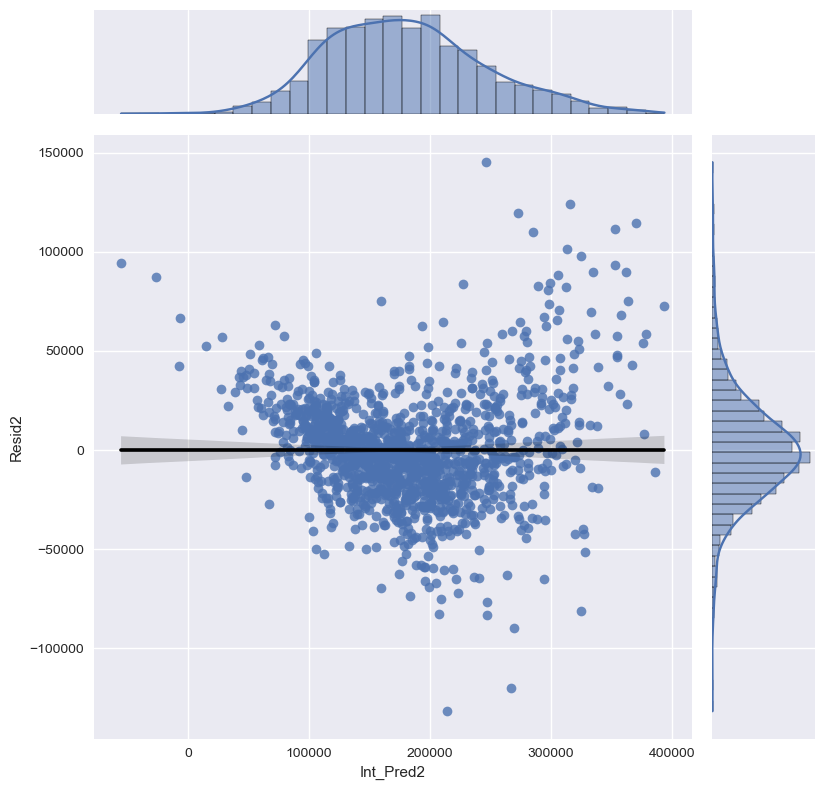

In [51]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Int_Pred2', y='Resid2', kind = "reg", data = df_reg2, ratio=5, height = 8, 
              line_kws={'color': 'black'})

In [52]:
corrMatrix2 = df_reg2.corr()
df_corrMatrix2 = pd.DataFrame(corrMatrix2)
round(df_corrMatrix2,3)

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,dt_1-1/2 STORY ALL AGES,nh_Veenker,Int_Pred2,Resid2
Lot Frontage,1,0,0,-0,0,0,-0,0,0,0,0,-0,-0,0,0
Lot Area,0,1,0,0,-0,0,0,-0,0,0,0,0,0,0,0
Overall Quality,0,0,1,-0,1,0,0,0,0,0,1,-0,0,1,0
Overall Cond,-0,0,-0,1,-0,-0,-0,-0,-0,0,-0,0,0,-0,-0
Year Built,0,-0,1,-0,1,0,0,0,0,0,1,-0,0,1,0
Masonry/Veneer Area,0,0,0,-0,0,1,0,0,0,0,0,-0,-0,0,0
Basement Finished Area,-0,0,0,-0,0,0,1,-1,0,-0,0,-0,0,0,0
Basement Unfinished Area,0,-0,0,-0,0,0,-1,1,0,-0,0,0,-0,0,0
1st Floor Area,0,0,0,-0,0,0,0,0,1,-0,0,-0,0,1,0
2nd Floor Area,0,0,0,0,0,0,-0,-0,-0,1,0,0,-0,0,-0


In [53]:
X_2=X_2.drop(['const'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif["features"] = X_2.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
4,61,Year Built
2,50,Overall Quality
8,29,1st Floor Area
3,28,Overall Cond
10,13,Garage Cars
7,8,Basement Unfinished Area
6,7,Basement Finished Area
0,4,Lot Frontage
9,3,2nd Floor Area
1,2,Lot Area


### The model dropped in R^2 value but it got a better and stronger model with less multi-collinearity. In the next run I would get rid of a few more features that have hihg Mulit-Cullinearity and a few with higher P values to get a much better looking model.

### The r^2 is .855, the AIC and BIC is 3.228e+04 , 3.235e+04 m and the F stat and F prob is F-statistic:	621.5 Prob (F-statistic)0.00.

In [56]:
# In this section I exaplined and ran some analysis on the model to get a better understanding of it

### Section 7C Proceed to eliminate ONE feature at a time to create a final model

In [58]:
X_2 = sm.add_constant(X_2) # adding a constant

reg2 = sm.OLS(y, X_2).fit()

predictions2 = reg2.predict(X_2) 
resid2 = reg2.resid
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     621.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:05   Log-Likelihood:                -16126.
No. Observations:                1387   AIC:                         3.228e+04
Df Residuals:                    1373   BIC:                         3.235e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.652e+05   7.61e+04    -12.681      0.000   -1.11e+06   -8.16e+05
Lot Frontage                89.5259     22.231      4.027      0.000      45.915     133.137
Lot Area                     0.6271      0.078      8.081      0.000       0.475       0.779
Overall Quality           1.799e+04    905.935     19.856      0.000    1.62e+04    1.98e+04
Overall Cond              6314.3211    752.125      8.395      0.000    4838.882    7789.760
Year Built                 433.9417     38.811     11.181      0.000     357.806     510.078
Masonry/Veneer Area         19.2086      4.760      4.035      0.000       9.871      28.547
Basement Finished Area      36.9090      3.091     11.940      0.000      30.845      42.973
Basement Unfinished Area    13.9948      2.945      4.753      0.000       8.218      19.771
1st Floor Area              62.5824      3.311     18.902      0.000      56.088      69.077
2nd Floor Area              49.9889      2.192     22.810      0.000      45.690      54.288
Garage Cars               9238.0895   1438.018      6.424      0.000    6417.139    1.21e+04
dt_1-1/2 STORY ALL AGES   3324.3958   2728.143      1.219      0.223   -2027.384    8676.176
nh_Veenker                 2.11e+04   8355.882      2.525      0.012    4706.291    3.75e+04
==============================================================================
Omnibus:                      156.348   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.553
Skew:                           0.516   Prob(JB):                    1.15e-122
Kurtosis:                       5.941   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X_3 = X_2.drop(['dt_1-1/2 STORY ALL AGES'], axis=1)

In [60]:
df_reg3 = X_3

reg3 = sm.OLS(y, X_3).fit()

predictions3 = reg3.predict(X_3) 
resid3 = reg3.resid
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     672.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:06   Log-Likelihood:                -16127.
No. Observations:                1387   AIC:                         3.228e+04
Df Residuals:                    1374   BIC:                         3.235e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -9.37e+05   7.25e+04    -12.918      0.000   -1.08e+06   -7.95e+05
Lot Frontage                89.3381     22.235      4.018      0.000      45.721     132.956
Lot Area                     0.6280      0.078      8.092      0.000       0.476       0.780
Overall Quality           1.803e+04    905.491     19.910      0.000    1.63e+04    1.98e+04
Overall Cond              6296.6377    752.118      8.372      0.000    4821.214    7772.062
Year Built                 419.7481     37.029     11.336      0.000     347.109     492.387
Masonry/Veneer Area         18.9812      4.757      3.990      0.000       9.649      28.314
Basement Finished Area      37.0614      3.089     11.997      0.000      31.001      43.122
Basement Unfinished Area    14.3085      2.934      4.877      0.000       8.553      20.064
1st Floor Area              62.4303      3.309     18.866      0.000      55.939      68.922
2nd Floor Area              50.3417      2.173     23.170      0.000      46.079      54.604
Garage Cars               9168.6776   1437.143      6.380      0.000    6349.445     1.2e+04
nh_Veenker                2.105e+04   8357.257      2.519      0.012    4653.783    3.74e+04
==============================================================================
Omnibus:                      157.025   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.752
Skew:                           0.518   Prob(JB):                    2.32e-123
Kurtosis:                       5.949   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# in this section I got rid of the last value with a high P value, everything looks better, but there still might be some muli-collinearity

### Section 7D Review Final Model for Multi-Collinearity

In [63]:
#Create Predictions dataframe
df_predictions3 = pd.DataFrame(predictions3)
df_predictions3=df_predictions3.rename(columns = {0:'Int_Pred3'})

#Create Residuals dataframe
df_resid3 = pd.DataFrame(resid3)
df_resid3=df_resid2.rename(columns = {0:'Resid3'})
df_reg3 = pd.concat([df_reg3, df_predictions3, df_resid3], axis=1)
df_reg3.head()


,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred3,Resid2
0,1,65,8450,7,5,2003,196,706,150,856,854,2,0,219313,-10781
1,1,80,9600,6,8,1976,0,978,284,1262,0,2,1,222584,-41049
2,1,68,11250,7,5,2001,162,486,434,920,866,2,0,220364,3256
3,1,60,9550,7,5,1915,0,216,540,961,756,3,0,177109,-35854
4,1,84,14260,8,5,2000,350,655,490,1145,1053,3,0,284555,-34418


<Figure size 2000x800 with 0 Axes>

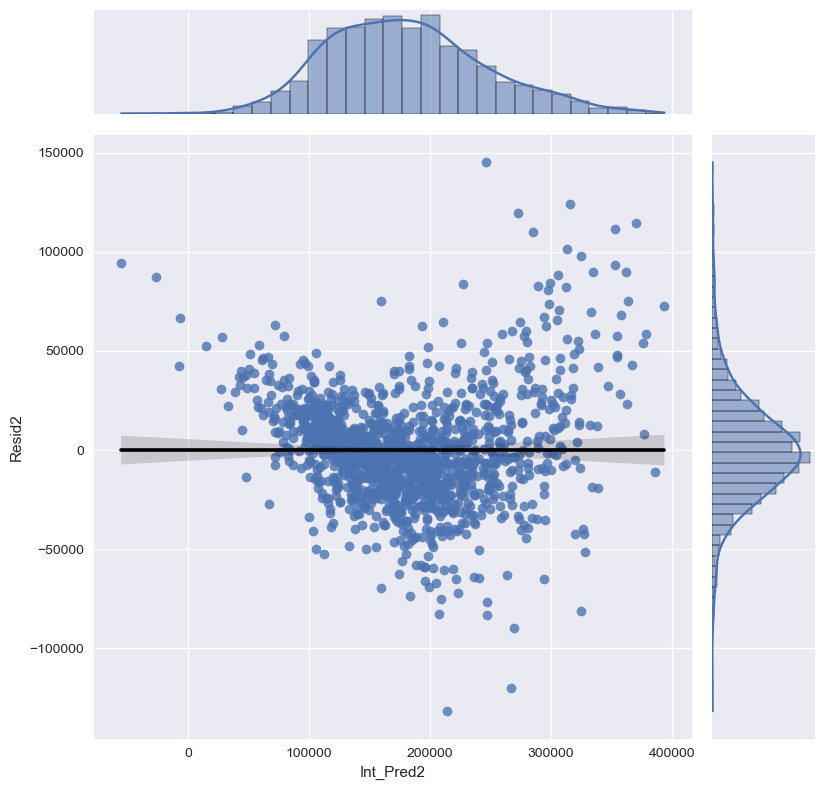

In [64]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Int_Pred2', y='Resid2', kind = "reg", data = df_reg2, ratio=5, height = 8, 
              line_kws={'color': 'black'})

In [65]:
corrMatrix3 = df_reg3.corr()
df_corrMatrix3 = pd.DataFrame(corrMatrix3)
round(df_corrMatrix3,3)

,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred3,Resid2
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,NaN,1,0,0,-0,0,0,-0,0,0,0,0,-0,0,0
Lot Area,NaN,0,1,0,0,-0,0,0,-0,0,0,0,0,0,0
Overall Quality,NaN,0,0,1,-0,1,0,0,0,0,0,1,0,1,0
Overall Cond,NaN,-0,0,-0,1,-0,-0,-0,-0,-0,0,-0,0,-0,-0
Year Built,NaN,0,-0,1,-0,1,0,0,0,0,0,1,0,1,0
Masonry/Veneer Area,NaN,0,0,0,-0,0,1,0,0,0,0,0,-0,0,0
Basement Finished Area,NaN,-0,0,0,-0,0,0,1,-1,0,-0,0,0,0,0
Basement Unfinished Area,NaN,0,-0,0,-0,0,0,-1,1,0,-0,0,-0,0,0
1st Floor Area,NaN,0,0,0,-0,0,0,0,0,1,-0,0,0,1,0


In [66]:
X_3=X_3.drop(['const'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_3.values, i) for i in range(X_3.shape[1])]
vif["features"] = X_3.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
4,61,Year Built
2,49,Overall Quality
8,29,1st Floor Area
3,28,Overall Cond
10,13,Garage Cars
7,8,Basement Unfinished Area
6,7,Basement Finished Area
0,4,Lot Frontage
9,2,2nd Floor Area
1,2,Lot Area


In [67]:
X_4=X_3.drop(['Year Built'],axis=1)
X_4 = sm.add_constant(X_4) # adding a constant

df_reg4 = X_4

reg4 = sm.OLS(y, X_4).fit()

predictions4 = reg4.predict(X_4) 
resid4 = reg4.resid
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     661.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:06   Log-Likelihood:                -16189.
No. Observations:                1387   AIC:                         3.240e+04
Df Residuals:                    1375   BIC:                         3.246e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.173e+05   5945.468    -19.732      0.000   -1.29e+05   -1.06e+05
Lot Frontage                63.9444     23.124      2.765      0.006      18.581     109.307
Lot Area                     0.5928      0.081      7.312      0.000       0.434       0.752
Overall Quality           2.268e+04    843.954     26.869      0.000     2.1e+04    2.43e+04
Overall Cond              2955.3589    723.323      4.086      0.000    1536.422    4374.296
Masonry/Veneer Area         22.0617      4.965      4.443      0.000      12.322      31.801
Basement Finished Area      41.0970      3.208     12.811      0.000      34.804      47.390
Basement Unfinished Area    16.2947      3.061      5.323      0.000      10.289      22.300
1st Floor Area              53.9278      3.369     16.007      0.000      47.319      60.537
2nd Floor Area              44.1461      2.198     20.083      0.000      39.834      48.458
Garage Cars               1.417e+04   1429.751      9.911      0.000    1.14e+04     1.7e+04
nh_Veenker                  2.3e+04   8734.273      2.634      0.009    5870.049    4.01e+04
==============================================================================
Omnibus:                      103.831   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.304
Skew:                           0.257   Prob(JB):                     4.37e-88
Kurtosis:                       5.588   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
X_4=X_4.drop(['const'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_4.values, i) for i in range(X_4.shape[1])]
vif["features"] = X_4.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
2,41,Overall Quality
7,28,1st Floor Area
3,13,Overall Cond
9,13,Garage Cars
6,8,Basement Unfinished Area
5,7,Basement Finished Area
0,4,Lot Frontage
8,2,2nd Floor Area
1,2,Lot Area
4,2,Masonry/Veneer Area


In [69]:
corrMatrix4 = df_reg4.corr()
df_corrMatrix4 = pd.DataFrame(corrMatrix4)
round(df_corrMatrix4,3)

,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,NaN,1,0,0,-0,0,-0,0,0,0,0,-0
Lot Area,NaN,0,1,0,0,0,0,-0,0,0,0,0
Overall Quality,NaN,0,0,1,-0,0,0,0,0,0,1,0
Overall Cond,NaN,-0,0,-0,1,-0,-0,-0,-0,0,-0,0
Masonry/Veneer Area,NaN,0,0,0,-0,1,0,0,0,0,0,-0
Basement Finished Area,NaN,-0,0,0,-0,0,1,-1,0,-0,0,0
Basement Unfinished Area,NaN,0,-0,0,-0,0,-1,1,0,-0,0,-0
1st Floor Area,NaN,0,0,0,-0,0,0,0,1,-0,0,0
2nd Floor Area,NaN,0,0,0,0,0,-0,-0,-0,1,0,-0


In [70]:
#In this section I set up the final model

### Section 7e Review Final Model for Mulit-Collinearity 

In [72]:
X_4 = sm.add_constant(X_4) # adding a constant

df_reg4 = X_4

reg4 = sm.OLS(y, X_4).fit()

predictions4 = reg4.predict(X_4) 
resid4 = reg4.resid
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     661.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:06   Log-Likelihood:                -16189.
No. Observations:                1387   AIC:                         3.240e+04
Df Residuals:                    1375   BIC:                         3.246e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.173e+05   5945.468    -19.732      0.000   -1.29e+05   -1.06e+05
Lot Frontage                63.9444     23.124      2.765      0.006      18.581     109.307
Lot Area                     0.5928      0.081      7.312      0.000       0.434       0.752
Overall Quality           2.268e+04    843.954     26.869      0.000     2.1e+04    2.43e+04
Overall Cond              2955.3589    723.323      4.086      0.000    1536.422    4374.296
Masonry/Veneer Area         22.0617      4.965      4.443      0.000      12.322      31.801
Basement Finished Area      41.0970      3.208     12.811      0.000      34.804      47.390
Basement Unfinished Area    16.2947      3.061      5.323      0.000      10.289      22.300
1st Floor Area              53.9278      3.369     16.007      0.000      47.319      60.537
2nd Floor Area              44.1461      2.198     20.083      0.000      39.834      48.458
Garage Cars               1.417e+04   1429.751      9.911      0.000    1.14e+04     1.7e+04
nh_Veenker                  2.3e+04   8734.273      2.634      0.009    5870.049    4.01e+04
==============================================================================
Omnibus:                      103.831   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.304
Skew:                           0.257   Prob(JB):                     4.37e-88
Kurtosis:                       5.588   Cond. No.                     1.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
X= sm.add_constant(X) # adding a constant

df_reg = X

reg = sm.OLS(y, X).fit()

predictions = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.559e+30
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:24:07   Log-Likelihood:                 29489.
No. Observations:                1387   AIC:                        -5.883e+04
Df Residuals:                    1313   BIC:                        -5.844e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -1.98e-09   8.31e-10     -2.383      0.017   -3.61e-09    -3.5e-10
Lot Frontage                  -6.842e-13    1.3e-13     -5.243      0.000    -9.4e-13   -4.28e-13
Lot Area                       1.267e-15   4.98e-16      2.546      0.011    2.91e-16    2.24e-15
Overall Quality                7.674e-11   6.13e-12     12.515      0.000    6.47e-11    8.88e-11
Overall Cond                   9.876e-12   4.48e-12      2.203      0.028    1.08e-12    1.87e-11
Year Built                     7.871e-13   4.24e-13      1.859      0.063   -4.37e-14    1.62e-12
Masonry/Veneer Area            8.714e-14   2.83e-14      3.079      0.002    3.16e-14    1.43e-13
Basement Finished Area         1.612e-13   1.87e-14      8.627      0.000    1.25e-13    1.98e-13
Basement Unfinished Area       7.848e-14   1.71e-14      4.595      0.000     4.5e-14    1.12e-13
1st Floor Area                 1.755e-13   2.79e-14      6.282      0.000    1.21e-13     2.3e-13
2nd Floor Area                 1.202e-13   2.98e-14      4.035      0.000    6.17e-14    1.79e-13
Bedrooms Above Grade           -7.03e-12   1.02e-11     -0.691      0.489    -2.7e-11    1.29e-11
Total Rooms Above Grade       -2.832e-12   5.67e-12     -0.499      0.618    -1.4e-11    8.29e-12
Fireplaces                    -1.201e-11   7.97e-12     -1.507      0.132   -2.76e-11    3.62e-12
Garage Cars                   -1.815e-11   9.88e-12     -1.838      0.066   -3.75e-11    1.22e-12
Sale Price                        1.0000   1.86e-16   5.38e+15      0.000       1.000       1.000
Porch Area                    -3.282e-14   2.97e-14     -1.106      0.269    -9.1e-14    2.54e-14
Full Bathrooms                 1.383e-11   1.23e-11      1.127      0.260   -1.02e-11    3.79e-11
Half Bathrooms                 2.501e-12   1.02e-11      0.245      0.806   -1.75e-11    2.25e-11
Pool                          -2.308e-11   6.88e-11     -0.335      0.737   -1.58e-10    1.12e-10
Extra Kitchens                 -6.95e-12   3.42e-11     -0.203      0.839   -7.41e-11    6.02e-11
Baths per Bedroom             -1.946e-11   2.42e-11     -0.805      0.421   -6.69e-11     2.8e-11
dt_1-1/2 STORY ALL AGES        6.667e-12   2.44e-11      0.273      0.785   -4.12e-11    5.45e-11
dt_1-STORY 1945 & OLDER         2.55e-11   2.72e-11      0.937      0.349   -2.79e-11    7.89e-11
dt_1-STORY PUD                 7.778e-12   2.45e-11      0.318      0.751   -4.03e-11    5.58e-11
dt_2 FAMILY CONVERSION        -1.964e-11   3.96e-11     -0.495      0.620   -9.74e-11    5.81e-11
dt_2-1/2 STORY ALL AGES        1.752e-11    5.1e-11      0.344      0.731   -8.25e-11    1.18e-10
dt_2-STORY 1945 & OLDER       -1.141e-11   3.47e-11     -0.329      0.742   -7.94e-11    5.66e-11
dt_2-STORY 1946 & NEWER       -9.671e-12   2.

### The results from this model compared to the initial, we were able to cut off a lot of features that were not needed and had really hihg mulit-collinearity, I kept some features that I thought might have similar results,but were needed for the data set in the end.But we ended up going from a 1.0 to a 0.841. AIC and BIC went from -5.883e+04, -5.844e+0 to 3.240e+0 ,3.246e+04. The F stat and Prob went from 4.559e+30 and 0 to 661.1 and 0. From the measures from the first model everything did drop, but the model became more effective as we got rid of features that weren't usefull for the dataset.


In [75]:
#Create Predictions dataframe
df_predictions4 = pd.DataFrame(predictions4)
df_predictions4=df_predictions4.rename(columns = {0:'Int_Pred4'})

#Create Residuals dataframe
df_resid4 = pd.DataFrame(resid4)
df_resid4=df_resid4.rename(columns = {0:'Resid4'})
df_reg4 = pd.concat([df_reg4, df_predictions4, df_resid4], axis=1)
df_reg4.head()



,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred4,Resid4
0,1,65,8450,7,5,196,706,150,856,854,2,0,213345,-4845
1,1,80,9600,6,8,0,978,284,1262,0,2,1,217412,-35912
2,1,68,11250,7,5,162,486,434,920,866,2,0,214014,9486
3,1,60,9550,7,5,0,216,540,961,756,3,0,211077,-71077
4,1,84,14260,8,5,350,655,490,1145,1053,3,0,286062,-36062


<Figure size 2000x800 with 0 Axes>

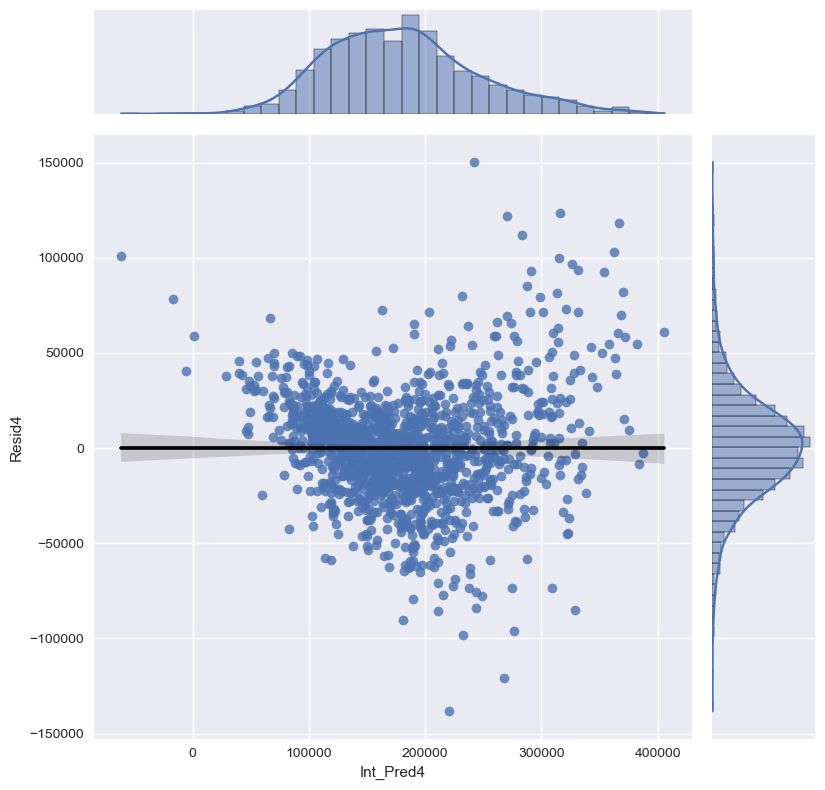

In [76]:
plt.figure(figsize=(20,8))
sns.jointplot(x='Int_Pred4', y='Resid4', kind = "reg", data = df_reg4, ratio=5, height = 8, 
              line_kws={'color': 'black'})

<Axes: xlabel='Int_Pred4', ylabel='Resid4'>

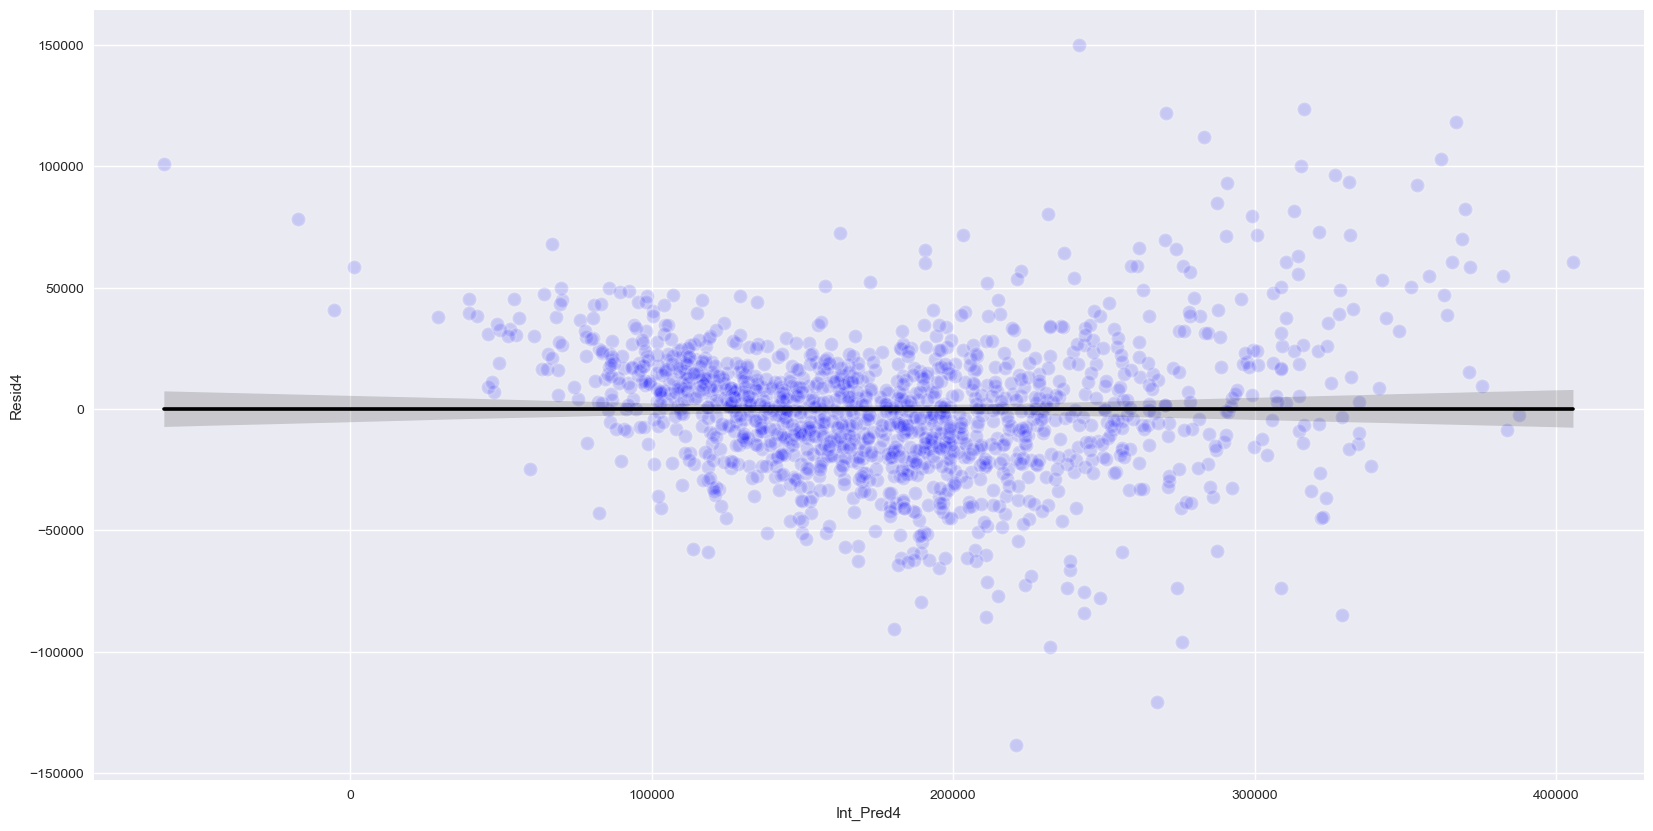

In [77]:
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred4', y='Resid4', 
              data = df_reg4, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidths":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

In [78]:
corrMatrix4 = df_reg4.corr()
df_corrMatrix4 = pd.DataFrame(corrMatrix4)
round(df_corrMatrix4,3)

,const,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred4,Resid4
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,NaN,1,0,0,-0,0,-0,0,0,0,0,-0,0,-0
Lot Area,NaN,0,1,0,0,0,0,-0,0,0,0,0,0,0
Overall Quality,NaN,0,0,1,-0,0,0,0,0,0,1,0,1,-0
Overall Cond,NaN,-0,0,-0,1,-0,-0,-0,-0,0,-0,0,-0,-0
Masonry/Veneer Area,NaN,0,0,0,-0,1,0,0,0,0,0,-0,0,-0
Basement Finished Area,NaN,-0,0,0,-0,0,1,-1,0,-0,0,0,0,-0
Basement Unfinished Area,NaN,0,-0,0,-0,0,-1,1,0,-0,0,-0,0,0
1st Floor Area,NaN,0,0,0,-0,0,0,0,1,-0,0,0,1,0
2nd Floor Area,NaN,0,0,0,0,0,-0,-0,-0,1,0,-0,0,-0


<Axes: title={'center': 'Correlation Heat Map'}>

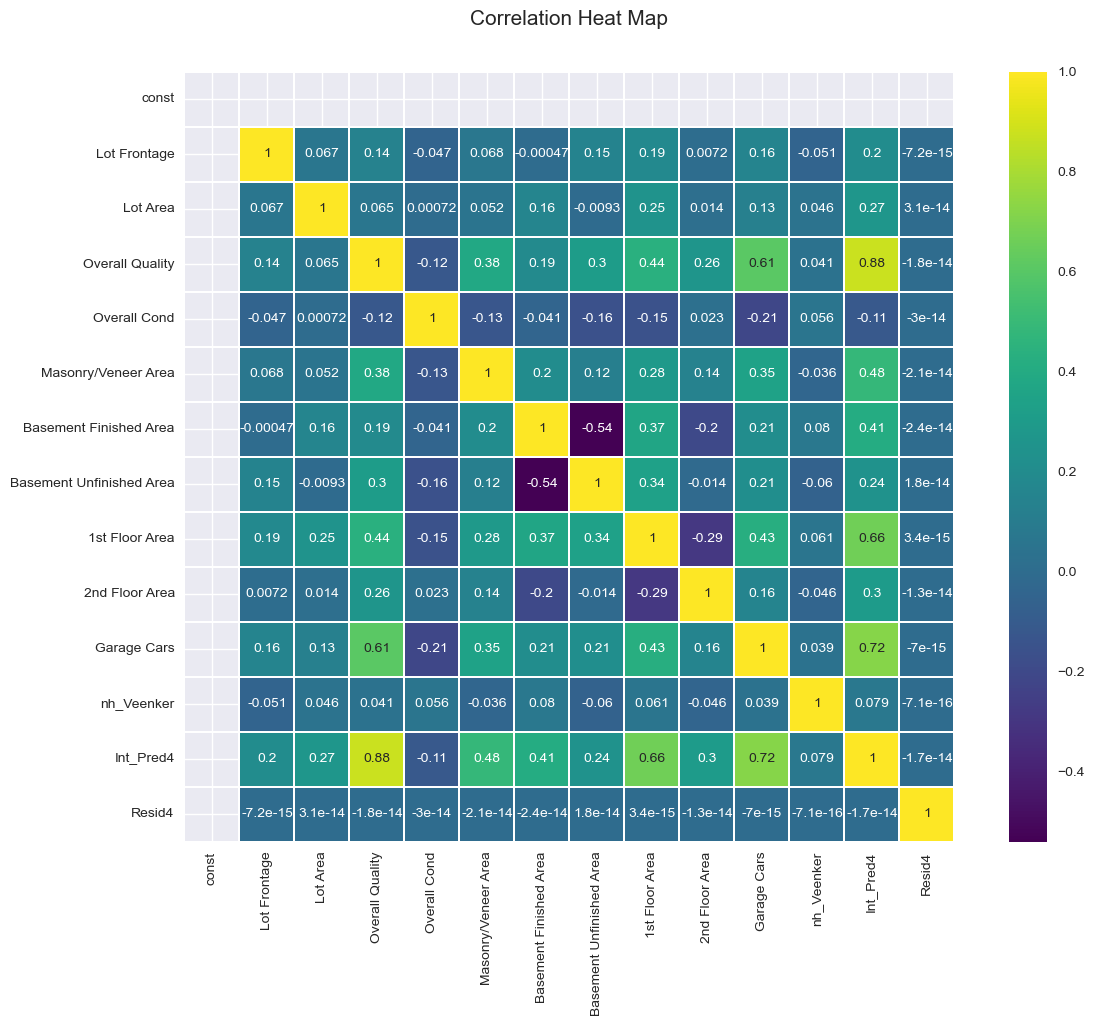

In [79]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix4,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [80]:

X5 = df_realestate['nh_Northridge']
y=df_realestate['Sale Price']
X5= sm.add_constant(X5) # adding a constant

df_reg5 = X5

reg5 = sm.OLS(y, X5).fit()

predictions5 = reg5.predict(X5) 
resid5 = reg5.resid
reg5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     131.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.44e-29
Time:                        00:24:08   Log-Likelihood:                -17401.
No. Observations:                1387   AIC:                         3.481e+04
Df Residuals:                    1385   BIC:                         3.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.774e+05   1852.140     95.795      0.000    1.74e+05    1.81e+05
nh_Northridge  1.284e+05   1.12e+04     11.477      0.000    1.06e+05     1.5e+05
==============================================================================
Omnibus:                      297.315   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.044
Skew:                           1.249   Prob(JB):                    2.75e-129
Kurtosis:                       5.000   Cond. No.                         6.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
df_realestate[['nh_Northridge','Sale Price']]

,nh_Northridge,Sale Price
0,0,208500
1,0,181500
2,0,223500
3,0,140000
4,1,250000
...,...,...
1382,0,175000
1383,0,210000
1384,0,266500
1385,0,142125


### .841% of the features can explain the variation within the target varible, there is mulit-collinearity in some of our last few features, but they were needed. Since we dropped down to 84% there might be more varibles that show the sale price that aren't listed or shown within the dataset. 

### When the value of nh_Northbirdge is 1 it means the sale price of the home is going to be more expensive. When a home is 0 nh_NB it means that it has presence while 0 meaning it is not present. It increases the price by $128,419.93.

### Anytime there is a Garage Car increase by 1 the Sale Price increases by $14,170

### Anytime the Overal Condititon increases by 1 the Sale Price increases by $2955.36

In [83]:
# Explained the final review of the model

## Section 8 Create the final dataset

In [85]:
X=df_reg4.drop(['const'], axis=1)
y=df_realestate['Sale Price']
X

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred4,Resid4
0,65,8450,7,5,196,706,150,856,854,2,0,213345,-4845
1,80,9600,6,8,0,978,284,1262,0,2,1,217412,-35912
2,68,11250,7,5,162,486,434,920,866,2,0,214014,9486
3,60,9550,7,5,0,216,540,961,756,3,0,211077,-71077
4,84,14260,8,5,350,655,490,1145,1053,3,0,286062,-36062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,62,7917,6,5,0,0,953,953,694,2,0,168075,6925
1383,85,13175,6,6,119,790,589,2073,0,2,0,234540,-24540
1384,66,9042,7,9,0,275,877,1188,1152,1,0,232280,34220
1385,68,9717,5,6,0,49,0,1078,0,1,0,98224,43901


In [86]:
df_realestate_model = pd.concat([X, y], axis=1)

In [87]:
df_realestate_model.head(1)

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Garage Cars,nh_Veenker,Int_Pred4,Resid4,Sale Price
0,65,8450,7,5,196,706,150,856,854,2,0,213345,-4845,208500


### The actual y is 208,500 , the predicted y is 213,345.22, and the residual is -$4845.22
### The y is the actuall price a home sold for, the predicted y is the y is the sale price we tried to predict using the variables we had to try and predict how much it costs, and the residual is the amount our model was off by.

In [89]:
# in this section I created my final dataframe/ dataset and explained the y values and the residaul of the model

## Section 9 Summary and Explaination of all steps

### This entire notebook we were trying to get the best features to go ahead and predict the sale price of a home. In this notebook we had to go ahead and clean the features up, since we can't use object and boolean features unless we went ahead and converted them into dummy varibles or encoded them. For this notebook we were wanting to only use the values we helped create throughout the last homeworks to get to this stage. So we ran a few regression models to find out which values had high P values that weren't benefitting to the model. We did this to clean our model up and try to make it make the most sense possible. Afterwords we worked on making sure their wasn't any muli-collinearity or duplicate data that was correlating and  hitting the model mulitple times to where it wasn't actually benefiting to the model . We did this a few times and creating some other models to look at the data and to see if had improved as we continued to clean it. Towards the end we got to 84.1% of the variation in the data was being explained by the target varibale of Sale Price. The Feature Variables are what help determine and predict the sale price (Target Variable).

### In Practical Implications this model could be used to predict the sale price of a home based on the fearute variables provided. So based on this dataset we are able to get a good strong prediction that can give us an idea of how much a house could go for, with some room for error.